In [17]:
# PKB PERTEMUAN1 11 - SEMESTER 1

In [18]:
# algo NLP ini bisa dikombinasi dgn yg lain. contoh disini setelah penerapan NLP lalu diterpakan Klasifikasi - ham n spam

In [19]:
# reading data
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
# drop unnecessary columns and rename cols: menghapus kolom yg tdk perlu dan mengganti nama kolom
# axis = 0 untuk baris dan axis = 1 untuk kolom
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
# inplace=True adalah parameter yang sering dipakai pada fungsi-fungsi di Pandas untuk menentukan apakah perubahan dilakukan langsung pada DataFrame asli atau tidak. Hapus kolom langsung dari df (tanpa perlu assignment ulang).
# Jika kamu tidak pakai inplace=True, contoh:
# df = df.drop('kolom')
# Kamu harus assign hasilnya kembali ke df, karena drop() hanya mengembalikan DataFrame baru, tidak mengubah yang asli.
# TP LEBIH AMAN ASSIGNMENT LAGI AJA
data.columns = ['label', 'text']
data.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='proportion'>

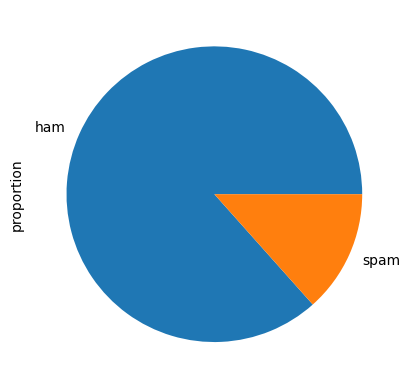

In [21]:
# check target balance
# format: data[mengambil data dri kolom mana].value_counts: untukMenghitung berapa kali setiap nilai unik muncul pada kolom label(normalize: untuk Mengubah hasil hitungan menjadi proporsi/persentase (bukan jumlah).plot.bar(): untuk membuat grafik bar chart untuk hasil perhitungan tadi.
data['label'].value_counts(normalize = True).plot.pie()#.plot.bar()

In [22]:
# check data shape
data.shape

(5572, 2)

In [23]:
# text preprocessing
# download nltk
# penerapan algoritma NLP 
import nltk #Mengimpor library NLTK untuk pemrosesan teks (NLP).
nltk.download('all') #Mendownload semua resource/komponen NLTK (stopwords, wordnet, tokenizer, dll). ⚠️ Biasanya download banyak file, cukup download yang diperlukan, misalnya: nltk.download('stopwords'); nltk.download('wordnet')
# create a list text
text = list(data['text']) #Mengubah kolom tersebut menjadi list Python(Mengambil kolom text dari DataFrame data)

# preprocessing loop
import re #Mengimpor library regex untuk membersihkan teks
from nltk.corpus import stopwords #Import daftar stopwords (kata-kata umum seperti “the”, “is”, “and”)
from nltk.stem import WordNetLemmatizer #Impor lemmatizer (mengubah kata ke bentuk dasarnya)
lemmatizer = WordNetLemmatizer() #Membuat objek lemmatizer
corpus = [] #Menyiapkan list kosong untuk menyimpan hasil teks yang sudah dibersihkan

# Proses pembersihan teks
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i]) #Menghapus karakter selain huruf (angka, simbol), ganti dengan spasi
    r = r.lower()
    r = r.split() #Memecah kalimat menjadi list kata
    r = [word for word in r if word not in stopwords.words('english')] #Menghapus stopwords (kata umum yang tidak penting)
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r) #Menggabungkan kata kembali menjadi satu kalimat
    corpus.append(r) #Simpan hasil teks yang sudah bersih ke dalam corpus
#assign corpus to data['text']
data['text'] = corpus #Mengganti kolom text dengan teks yang sudah diproses
data.head(10)



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

KeyboardInterrupt: 

In [ ]:
# Create Feature and Label sets
X = data['text'] #Mengambil kolom text sebagai fitur/input untuk model. Kolom ini berisi teks yang sudah diproses.
y = data['label'] #Mengambil kolom label sebagai target/output yang ingin diprediksi (misal: spam/ham, positif/negatif)

# train test split (66% train - 33% test, bebas bisa diganti)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=123)
#train_test_split(X, y, ...)
# Membagi fitur (X) dan label (y)
test_size=0.26
# 26% data jadi test set, sisanya 74% jadi train set (kamu menulis komentar 66–33%, tapi kode menghasilkan 74–26)
random_state=123
# Agar pembagian data konsisten setiap kali run (semacam seed) -- kurang paham maksud e
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)


Training Data : (3343,)
Testing Data :  (2229,)


In [ ]:
# Train Bag of Words model
# training model ML
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer : 
# Alat dari sklearn untuk mengubah teks menjadi matriks angka berdasarkan jumlah kemunculan kata (Bag of Words)
cv = CountVectorizer() #CountVectorizer()	Menginisialisasi model BoW (belum diterapkan ke data)



# fit dan transform data training
X_train_cv = cv.fit_transform(X_train) # fit
# Mempelajari vocabulary dari data training
X_train_cv.shape #Ini menampilkan ukuran matriks hasil transformasi.


(4123, 5966)

In [ ]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression #Model machine learning untuk klasifikasi (contoh: spam vs ham, positif vs negatif)

# membuat objek model
lr = LogisticRegression() #lr	Variabel model Logistic Regression
# LogisticRegression()	Inisialisasi model (dengan parameter default)

# melatih model
lr.fit(X_train_cv, y_train)
# .fit()	Melatih model menggunakan data training
# X_train_cv	Fitur teks yang sudah diubah menjadi angka (Bag of Words)
# y_train	Label target (misal: spam/ham, positif/negatif)

# transform X_test using CV
X_test_cv = cv.transform(X_test) #cv.transform(X_test)
# Mengubah teks test menjadi bentuk numerik, menggunakan vocabulary yang sama dari training
# Jangan pakai .fit_transform() untuk test, Karena vocabulary harus sama dengan dataset training

# generate predictions
predictions = lr.predict(X_test_cv) #lr.predict(...)
# Model menghasilkan prediksi label berdasarkan data test
predictions


array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [25]:
# confusion matrix
import pandas as pd
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df = metrics.confusion_matrix(y_test, predictions)
# Menghasilkan confusion matrix antara label asli (y_test) dan prediksi model (predictions)

#
df


NameError: name 'predictions' is not defined